# Analysis for Continuous Improvement

Author Name: Mia Keller

9-digit PID: 730389267

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. COMP110 should include more review material for quizzes because students consolidate class material through them.
2. COMP110 should offer optional beginner review material because students who have never coded before are finding this class difficult.
3. COMP110 should ease the pace of the course because the majority of students are not computer science majors and need this class for another reason and need to focus on their other endeavors.
4. COMP110 should require photo proof of students' notes because students who keep their own notes are more likely to do better in the course.
5. COMP110 should increase the amount of time per coding assignment because students already spend a lot of time on their computer doing work, damaging their mental health.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: The idea of easing the pace of the course for those who are not solely interested in computer science lacks data because although we may know whether students find the course difficult, we have no data on whether or not they enjoy spending time working on projects, or how long they work on each project for. 

2. Suggestion for how to collect data to support this idea in the future: A question could be asked to discover how much time students are spending working on assignments and whether or not this class is negatively affecting their performance in others. 

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: COMP110 should offer beginner review material because students who have never coded before are finding this class difficult.

2. This idea is more valuable than the others brainstormed because: I believe this idea will have the largest impact on students' performance in this class. It is of value knowing the relationship between previous coding experience and students' success in this course and their view of the course. Offering supplemental and optional videos for students who need more review and practice, especially nailing down concepts in the beginning, will greatly boost their knowledge of computer science and help them master more difficult concepts as the course progresses.


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [2]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [3]:
from data_utils import read_csv_rows, column_values, columnar, head, select, count

Next, we import the data from the surveys. 

In [4]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

To perform our analysis, we will be looking at students who are not computer science majors (`comp_major = "No"`). We will also assess whether they have prior experience to coding (`prior_exp`).

To gauge their perception of the course, we will look at how they find the pace and difficulty of the class, as well as gauge their understanding of the material (`pace`, `difficulty`, `understanding`.)

### Collecting Non-Computer Science Majors' Data
We first need to obtain these values from students who are not computer science majors. To do so, we will first convert our csv file to a row-oriented table.  

In [5]:
data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

Then, we will need to narrow down our data to those participants who are not computer science majors or minors. We do this by testing if the key `"comp_major"` is equal to `"No"`. If this is true, we append this row to a new, final table of data, containing the information of only those who are not computer science majors. 

In [6]:
final_data: list[dict[str, str]] = []

for subject in data_rows:
    if subject["comp_major"] == "No":
        final_data.append(subject)

To ensure that this process has worked, lets tabulate our data into a table that is easier to read. We will use the `tabulate` function imported from tabulate. First, we have to transform our row-oriented table into a column-oriented table, however. We will import the `columnar` function from `data_utils`.

Then, to select the columns we are focusing on (`"row"`, `"comp_major"`, `"prior_exp"`, `"pace"`, `"difficulty"`, `"understanding"`), we will use the `select` function imported from `data_utils` with these headings as arguments.

We can then use the `tabulate` and `head` functions to check if the first 5 values have correct `comp_major` values of `"No"`. 

In [7]:
from tabulate import tabulate

data_cols: dict[str, list[str]] = columnar(final_data)

selected_data: dict[str, list[str]] = select(data_cols, ["row", "comp_major", "prior_exp", "pace", "difficulty", "understanding"])

tabulate(head(selected_data, 5), selected_data.keys(), "html")

row,comp_major,prior_exp,pace,difficulty,understanding
0,No,7-12 months,1,1,7
1,No,None to less than one month!,6,6,3
9,No,None to less than one month!,7,4,6
12,No,None to less than one month!,5,5,4
13,No,2-6 months,4,3,7


We are now working with only the data from participants who are not computer science majors. However, some of these students have prior experience in coding through taking classes or self-directed teaching. 

While there a several variables in the data to account for classes taken, the `prior_exp` data column provides a good overall idea of how much experience a person has. We can further select for those who have none to less than one month of experience.

In [8]:
no_experience: list[dict[str, str]] = []

for subject in final_data:
    if subject["prior_exp"] == "None to less than one month!":
        no_experience.append(subject)

To ensure that our process has worked, we can `tabulate` the first five rows of the new dataset.

In [9]:
no_experience_cols: dict[str, list[str]] = columnar(no_experience)

no_experience_selected: dict[str, list[str]] = select(no_experience_cols, ["row", "comp_major", "prior_exp", "pace", "difficulty", "understanding"])

tabulate(head(no_experience_selected, 5), no_experience_selected.keys(), "html")

row,comp_major,prior_exp,pace,difficulty,understanding
1,No,None to less than one month!,6,6,3
9,No,None to less than one month!,7,4,6
12,No,None to less than one month!,5,5,4
14,No,None to less than one month!,4,4,5
16,No,None to less than one month!,6,7,2


### Assessing Overall Course Difficulty
Now that we are focusing on non-computer science majors with little to no previous coding experience, we can begin analysis on how they are viewing the course. `pace`, `difficulty`, and `understanding` all utilize likert scales to assess these concepts.

`pace` has a scale of 1-7, with 1 meaning the class is moving very slowly, and 7 meaning the class is moving very quickly. 

`difficulty` has a scale of 1-7, with 1 meaning the class is very easy, and 7 meaning the class is very difficult.

`understanding` has a scale of 1-7, with 1 meaning students are typically lost in the class, and 7 meaning that students typically understand everything.

Using the `count` function, we can assess the frequencies of these values to determine how students who have little to no prior coding experience are finding the class.

In [10]:
pace_counts: dict[str, int] = count(no_experience_selected["pace"])
print(f"pace_counts: {pace_counts}")

difficulty_counts: dict[str, int] = count(no_experience_selected["difficulty"])
print(f"difficulty_counts: {difficulty_counts}")

understanding_counts: dict[str, int] = count(no_experience_selected["understanding"])
print(f"understanding_counts: {understanding_counts}")

pace_counts: {'6': 80, '7': 39, '5': 83, '4': 47, '3': 4, '2': 1}
difficulty_counts: {'6': 57, '4': 51, '5': 73, '7': 45, '3': 22, '2': 6}
understanding_counts: {'3': 45, '6': 42, '4': 45, '5': 80, '2': 22, '7': 8, '1': 12}


We can chart these in a graph to visualize the spread of the data better. We'll first plot the `pace` data.

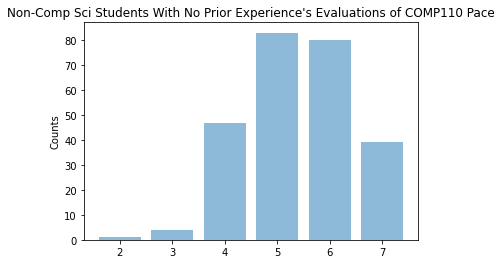

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt 

labels = ['2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5]
counts = [1, 4, 47, 83, 80, 39]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students With No Prior Experience's Evaluations of COMP110 Pace")

plt.show()

We can then plot the `difficulty` data.

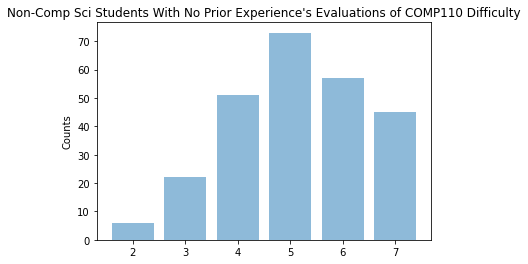

In [12]:
# Making the difficulty plot
labels = ['2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5]
counts = [6, 22, 51, 73, 57, 45]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students With No Prior Experience's Evaluations of COMP110 Difficulty")

plt.show()

Finally, we can plot the `understanding` data.

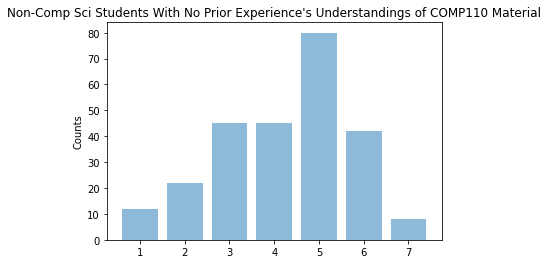

In [13]:
# Making the understanding plot
labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]
counts = [12, 22, 45, 45, 80, 42, 8]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students With No Prior Experience's Understandings of COMP110 Material")

plt.show()

It appears as if non-computer science majors with little to no coding experience are finding the pace of the class to be fast, the material generally difficult, and their understanding of the material fairly okay. 

We can compare these results to those non-computer science majors with some experience coding, in particular, those with greater than 1 month of coding experience. 

We will follow the same steps as above to generate a dataset of non-computer science majors with some coding experience, using `tabulate` to check our work.

In [14]:
some_experience: list[dict[str, str]] = []

for subject in final_data:
    if subject["prior_exp"] != "None to less than one month!":
        some_experience.append(subject)

some_experience_cols: dict[str, list[str]] = columnar(some_experience)

some_experience_selected: dict[str, list[str]] = select(some_experience_cols, ["row", "comp_major", "prior_exp", "pace", "difficulty", "understanding"])

tabulate(head(some_experience_selected, 5), some_experience_selected.keys(), "html")

row,comp_major,prior_exp,pace,difficulty,understanding
0,No,7-12 months,1,1,7
13,No,2-6 months,4,3,7
15,No,2-6 months,5,7,3
17,No,1-2 years,4,4,6
22,No,2-6 months,5,5,5


We can then perform the same analyses to determine how these student view the course in terms of pace, difficulty, and understanding. 

In [15]:
some_pace_counts: dict[str, int] = count(some_experience_selected["pace"])
print(f"pace_counts: {some_pace_counts}")

some_difficulty_counts: dict[str, int] = count(some_experience_selected["difficulty"])
print(f"difficulty_counts: {some_difficulty_counts}")

some_understanding_counts: dict[str, int] = count(some_experience_selected["understanding"])
print(f"understanding_counts: {some_understanding_counts}")

pace_counts: {'1': 1, '4': 21, '5': 38, '6': 13, '7': 3, '3': 5}
difficulty_counts: {'1': 2, '3': 13, '7': 3, '4': 32, '5': 24, '6': 3, '2': 4}
understanding_counts: {'7': 13, '3': 8, '6': 27, '5': 21, '4': 11, '1': 1}


We can then plot these graphs as well, starting with `pace`.

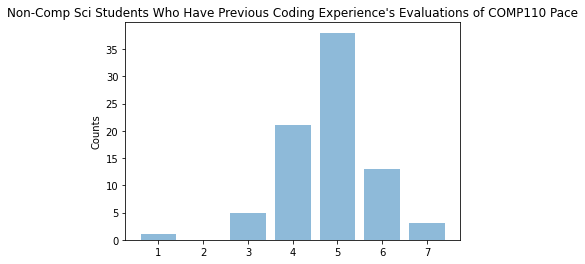

In [25]:
labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]
counts = [1, 0, 5, 21, 38, 13, 3]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students Who Have Previous Coding Experience's Evaluations of COMP110 Pace")

plt.show()

Next, `difficulty`.

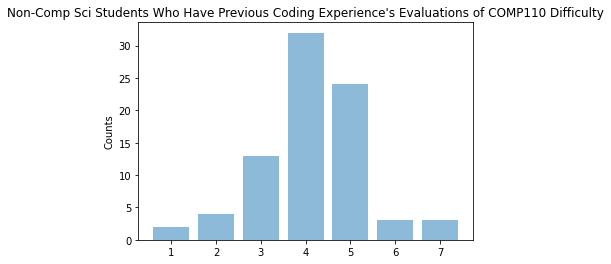

In [24]:
labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]
counts = [2, 4, 13, 32, 24, 3, 3]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students Who Have Previous Coding Experience's Evaluations of COMP110 Difficulty")

plt.show()

Finally, `understanding`.

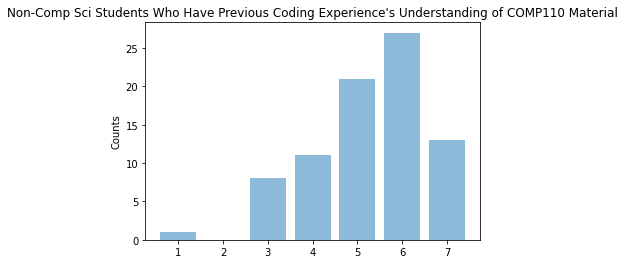

In [23]:
labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]
counts = [1, 0, 8, 11, 21, 27, 13]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students Who Have Previous Coding Experience's Understanding of COMP110 Material")

plt.show()

Comparing the graphs, it can be seen that non-computer science students who have some prior coding experience are generally finding the pace of the course to be slower, the material less difficult, and in general have a better understanding of the content. 

### Assessing COMP110 Resource Effectiveness

We want to find a way to help students who have no prior coding experience "catch up" on material that other students may have more experience with in the past. One idea is to implement optional videos or tutoring sessions that cover the basics of python more in-depth, allowing students to master these basics before moving onto harder concepts.

To assess whether these measures would be effective, we can analyze the effectiveness of tutoring (`tutoring_effective`), office hours (`oh_effective`) and lesson videos (`ls_effective`). These variables were assessed on a likert scale of 1-7, with 1 being not effective and 7 being very effective in learning course concepts.

Specifically, we will look at non-computer science majors with none to less than a month of prior coding experience. First, we will use the `make_int` function to turn their columns of data into numerical values to allow for easier analysis. 

Using the `threshold` function, we can then select for those students who are finding the pace of the course to be fast (`pace >= 4`), the material difficult (`difficulty >= 4`), but their understanding to be pretty well (`understanding >= 4`). 

While these students are generally finding the course difficult, they also have a pretty good understanding of the material. We can see if resources such as tutoring, office hours, and lesson videos are effective in helping their understanding by how they rate them. 

We can use the `count_ints` function to determine how the majority of these students rate these resources in terms of their effectiveness in aiding their understanding.

In [19]:
from data_utils import make_int, threshold, count_ints

no_experience_selected_2: dict[str, list[str]] = select(no_experience_cols, ["pace", "difficulty", "understanding", "oh_effective", "tutoring_effective", "ls_effective"])

int_no_experience_selected_2: dict[str, list[int]] = make_int(no_experience_selected_2)

threshold_int_no_experience_selected_2: dict[str, list[int]] = threshold(int_no_experience_selected_2, 4, ["pace", "difficulty", "understanding"])

oh_effectiveness: dict[int, int] = count_ints(threshold_int_no_experience_selected_2["oh_effective"])
print(f"Office hours effectiveness: {oh_effectiveness}")

ls_effectiveness: dict[int, int] = count_ints(threshold_int_no_experience_selected_2["ls_effective"])
print(f"Video lesson effectiveness: {ls_effectiveness}")

tutoring_effectiveness: dict[int, int] = count_ints(threshold_int_no_experience_selected_2["tutoring_effective"])
print(f"Tutoring effectiveness: {tutoring_effectiveness}")

Office hours effectiveness: {7: 92, 6: 42, 5: 28, 4: 28, 3: 6, 1: 1, 2: 2}
Video lesson effectiveness: {5: 50, 7: 93, 4: 22, 6: 67, 1: 3, 3: 15, 2: 4}
Tutoring effectiveness: {6: 18, 7: 30, 5: 21, 4: 41, 1: 2, 2: 2, 3: 7}


We can then plot this data to visualize it's spread better, starting with `oh_effective`.

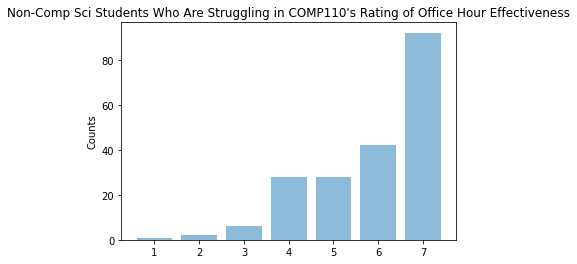

In [20]:
labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]
counts = [1, 2, 6, 28, 28, 42, 92]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students Who Are Struggling in COMP110's Rating of Office Hour Effectiveness")

plt.show()

Next, `ls_effective`.

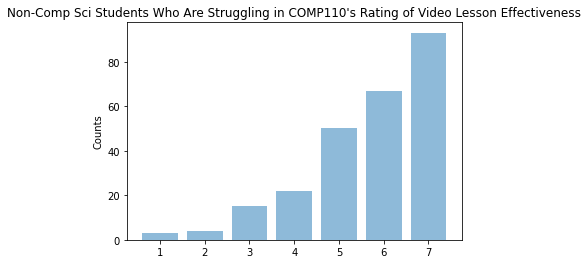

In [21]:
labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]
counts = [3, 4, 15, 22, 50, 67, 93]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students Who Are Struggling in COMP110's Rating of Video Lesson Effectiveness")

plt.show()

Finally, `tutoring_effective`.

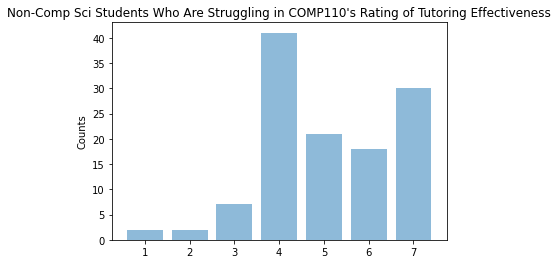

In [22]:
labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]
counts = [2, 2, 7, 41, 21, 18, 30]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title("Non-Comp Sci Students Who Are Struggling in COMP110's Rating of Tutoring Effectiveness")

plt.show()

Thus, students who find the pace and difficulty of COMP110 to be quick and hard, but have a good understanding of the course material, generally rate office hours, lesson videos, and tutoring to be effective in learning the material.

We can conclude that these resources are most helpful to the COMP110 population which is struggling the hardest in the class.

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion

The aim of this analysis was to assess non-computer science students' general view of COMP110 difficulty, and more specifically, those students who have little to no prior coding experience. It was hypothesized that these students would be struggling in the course the most, as they have no background knowledge to build off of, and are taking the course to fulfill a major requirement or for another reason. Further analysis would reveal if supplemental or optional review sessions or lesson videos would be helpful to this group in particular, as they could potentially build a stronger base of knowledge that some of their other peers may already have.

In the first section of the analysis, it was found that non-computer science majors with little to no coding experience (none to less than one month) generally found the pace of COMP110 to be very fast, the difficulty to be very hard, and their understanding of the material to be generally poor in comparison to those with some coding experience (2 months or more). 

In the second section of the analysis, the effectiveness of lesson videos, office hours, and tutoring in helping students learn course material was analyzed. Specifically, the analysis was performed on non-computer science students with no prior experience, who found the pace of the course to be generally fast (>= 4 out of a 7-point scale), the difficulty to be generally hard (>= 4 out of a 7-point scale), but their understanding of the course material to be fairly good (>=4 out of a 7-point scale). Although these students are finding the course hard in terms of pace and difficulty, they are still managing to understand COMP110 concepts. An analysis was performed on these students' ratings of lesson videos, office hours, and tutoring effectiveness, which found that video lessons were most effecitve, followed by office hours, and then tutoring. These students may be getting the most out of video lessons, and thus the idea of implementing supplemental python review lessons for beginners has merit. 

One refinement of this analysis was that a specific subgroup of people was analyzed; meaning that, the entire COMP110 population may be rating office hours, lesson videos, and tutoring high. To further validate our conclusions, we could compare these results with computer science major's ratings of resource effectiveness. We could also look at non-computer science majors who rate their understanding to be poor's view of the effectiveness of these resources.

Course staff may be negatively impacted by this implementation, as more materials, review sessions, and other resources would need to be produced, focusing specifically on python basics. Thus, less time can be spent preparing lesson plans and taking care of other course work. However, students would benefit greatly and their understanding would improve. 

